In [11]:
import pandas as pd
import numpy as np
import seaborn as sns
from warnings import filterwarnings
filterwarnings('ignore')
import matplotlib.pyplot as plt

In [12]:
plt.rcParams['figure.figsize']= [15,8]

In [13]:
test = pd.read_csv('C:/Users/DELL/Downloads/TWEET/test (1).csv')
test.head()

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan


In [14]:
train = pd.read_csv('C:/Users/DELL/Downloads/TWEET/train (1).csv')
train.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [15]:
train.isnull().sum()/len(train)

id          0.000000
keyword     0.008013
location    0.332720
text        0.000000
target      0.000000
dtype: float64

In [16]:
train.shape

(7613, 5)

In [17]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7552 non-null   object
 2   location  5080 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 297.5+ KB


In [18]:
test.isnull().sum()/len(test)

id          0.000000
keyword     0.007968
location    0.338645
text        0.000000
dtype: float64

In [19]:
test.shape

(3263, 4)

In [20]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3263 entries, 0 to 3262
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        3263 non-null   int64 
 1   keyword   3237 non-null   object
 2   location  2158 non-null   object
 3   text      3263 non-null   object
dtypes: int64(1), object(3)
memory usage: 102.1+ KB


In [21]:
train.fillna('0',inplace = True)

In [22]:
test.fillna('0',inplace = True)

## replaced the missing value with 0

In [23]:
train['target'].value_counts()

target
0    4342
1    3271
Name: count, dtype: int64

In [24]:
## EDA

In [25]:
num1 = train.select_dtypes(include ='number').columns
num1

Index(['id', 'target'], dtype='object')

In [26]:
cat1 = train.select_dtypes(exclude ='number').columns
cat1

Index(['keyword', 'location', 'text'], dtype='object')

In [27]:
num2 = test.select_dtypes(include='number').columns
num2

Index(['id'], dtype='object')

In [28]:
cat2 = test.select_dtypes(exclude='number').columns
cat2

Index(['keyword', 'location', 'text'], dtype='object')

## Text Preprocessing

In [30]:
import re,string
import nltk
from nltk.tokenize import word_tokenize,WordPunctTokenizer
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer,WordNetLemmatizer
from nltk.corpus import wordnet
from nltk import pos_tag

In [31]:
## cleaning the text columns
def clean(text):
    text= text.lower() ## lowercase text
    text = re.sub('[^A-Za-z]+',' ',str(text)) ## removing special characters and numeric  values
    text = re.sub('/s+',' ',text) ## remove extra space and tabs
    text = re.compile('<.*?>').sub('',text)
    return text


In [32]:
## applying a function
train['cleaned text'] = train['text'].apply(clean)
train['cleaned text'].head(5)

0    our deeds are the reason of this earthquake ma...
1                forest fire near la ronge sask canada
2    all residents asked to shelter in place are be...
3     people receive wildfires evacuation orders in...
4    just got sent this photo from ruby alaska as s...
Name: cleaned text, dtype: object

In [33]:
test['cleaned text'] = test['text'].apply(clean)
test['cleaned text'].head(5)

0                   just happened a terrible car crash
1    heard about earthquake is different cities sta...
2    there is a forest fire at spot pond geese are ...
3                apocalypse lighting spokane wildfires
4           typhoon soudelor kills in china and taiwan
Name: cleaned text, dtype: object

## Removal of stop words 

In [35]:
## Removal of stop words
def stopword(string):
    a=[i for i in string.split() if i not in stopwords.words("english")]
    return " ".join(a)

In [36]:
train['cleaned text'] = train['cleaned text'].apply(stopword)
train['cleaned text'].head(5)

0         deeds reason earthquake may allah forgive us
1                forest fire near la ronge sask canada
2    residents asked shelter place notified officer...
3    people receive wildfires evacuation orders cal...
4    got sent photo ruby alaska smoke wildfires pou...
Name: cleaned text, dtype: object

In [37]:
test['cleaned text']= test['cleaned text'].apply(stopword)
test['cleaned text'].head(5)

0                          happened terrible car crash
1    heard earthquake different cities stay safe ev...
2    forest fire spot pond geese fleeing across str...
3                apocalypse lighting spokane wildfires
4                  typhoon soudelor kills china taiwan
Name: cleaned text, dtype: object

## Stemming

In [39]:
snow = SnowballStemmer("english")
def stemming(string):
    a=[snow.stem(i) for i in word_tokenize(string)]
    return " ".join(a)

In [40]:
train['cleaned text'] = train['cleaned text'].apply(stemming)
train['cleaned text'].head(5)

0            deed reason earthquak may allah forgiv us
1                 forest fire near la rong sask canada
2    resid ask shelter place notifi offic evacu she...
3          peopl receiv wildfir evacu order california
4    got sent photo rubi alaska smoke wildfir pour ...
Name: cleaned text, dtype: object

In [41]:
test['cleaned text']=test['cleaned text'].apply(stemming)
test['cleaned text'].head(5)

0                             happen terribl car crash
1        heard earthquak differ citi stay safe everyon
2    forest fire spot pond gees flee across street ...
3                       apocalyps light spokan wildfir
4                   typhoon soudelor kill china taiwan
Name: cleaned text, dtype: object

## Lemmatization

In [43]:
wl = WordNetLemmatizer()

def pos(tag):
    if tag.startswith('J'):
        return wordnet.ADJ
    elif tag.startswith('V'):
        return wordnet.VERB
    elif tag.startswith('N'):
        return wordnet.NOUN
    elif tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN

In [44]:
def lemmatizer(string):
    word_pos_tags = nltk.pos_tag(word_tokenize(string))
    a=[wl.lemmatize(tag[0], pos(tag[1])) for idx, tag in enumerate(word_pos_tags)]
    return " ".join(a)

In [45]:
train['cleaned text'] = train['cleaned text'].apply(lemmatizer)
train['cleaned text']

0                deed reason earthquak may allah forgiv u
1                    forest fire near la rong sask canada
2       resid ask shelter place notifi offic evacu she...
3             peopl receiv wildfir evacu order california
4       get sent photo rubi alaska smoke wildfir pour ...
                              ...                        
7608    two giant crane hold bridg collaps nearbi home...
7609    aria ahrari thetawniest control wild fire cali...
7610             utc km volcano hawaii http co zdtoyd ebj
7611    polic investig e bike collid car littl portug ...
7612    late home raze northern california wildfir abc...
Name: cleaned text, Length: 7613, dtype: object

In [46]:
test['cleaned text']=test['cleaned text'].apply(lemmatizer)
test['cleaned text']

0                                happen terribl car crash
1           heard earthquak differ citi stay safe everyon
2       forest fire spot pond gee flee across street c...
3                          apocalyps light spokan wildfir
4                      typhoon soudelor kill china taiwan
                              ...                        
3258        earthquak safeti los angel safeti fasten xrwn
3259    storm ri wors last hurrican citi amp other har...
3260         green line derail chicago http co utbxlcbiuy
3261    meg issu hazard weather outlook hwo http co x ...
3262      cityofcalgari activ municip emerg plan yycstorm
Name: cleaned text, Length: 3263, dtype: object

## Train Test split

In [48]:
from sklearn.model_selection import train_test_split

In [49]:
xtrain,xtest,ytrain,ytest = train_test_split(train['cleaned text'],train['target'],test_size= 0.30 ,random_state=100)
print(xtrain.shape)
print(xtest.shape)
print(ytrain.shape)
print(ytest.shape)

(5329,)
(2284,)
(5329,)
(2284,)


## Vectorization TD-IDF on Train Dataset

In [51]:
from sklearn.feature_extraction.text import TfidfVectorizer 
tfidf = TfidfVectorizer()

In [52]:
## converting xtrain to vector - Fit and Transform

xtrain_tfidf = tfidf.fit_transform(xtrain)

## converting xtest to vector -- transform

xtest_tfidf = tfidf.transform(xtest)

In [53]:
print(xtrain_tfidf)

  (0, 13109)	0.2953278615964043
  (0, 6819)	0.3142525117036636
  (0, 5939)	0.2885733616089154
  (0, 2119)	0.06072402603613517
  (0, 5492)	0.06146898550676112
  (0, 11813)	0.22541724792615872
  (0, 4436)	0.19973809783141058
  (0, 7183)	0.3142525117036636
  (0, 13336)	0.16787006457545442
  (0, 7827)	0.25718336314673407
  (0, 77)	0.3142525117036636
  (0, 974)	0.2342497046207686
  (0, 13611)	0.30359470146473316
  (0, 5443)	0.2058250629572377
  (0, 2802)	0.237215061419419
  (0, 8425)	0.17007153487816895
  (0, 4590)	0.25718336314673407
  (1, 7487)	0.21504235339335953
  (1, 570)	0.2828556934749326
  (1, 12795)	0.2813548966395483
  (1, 756)	0.2912005880764015
  (1, 11312)	0.5465134845450796
  (1, 6726)	0.23206623315006616
  (1, 5417)	0.26230715092469564
  (1, 11061)	0.45458837115856754
  :	:
  (5326, 14231)	0.4939866676402794
  (5326, 7546)	0.4939866676402794
  (5326, 555)	0.4103910802879629
  (5326, 11010)	0.2875888860123708
  (5326, 2119)	0.0911000345919458
  (5326, 5492)	0.0922176454944778


In [54]:
print(xtest_tfidf)

  (0, 13336)	0.22995856708676699
  (0, 12861)	0.30298391442483485
  (0, 11564)	0.34245201000202435
  (0, 9424)	0.37472810357891734
  (0, 7894)	0.29902740742416467
  (0, 6642)	0.24455828012688133
  (0, 5492)	0.08420393393640756
  (0, 4192)	0.24815266483932852
  (0, 2119)	0.08318344339906188
  (0, 1913)	0.3455286774986886
  (0, 508)	0.38070553035049687
  (0, 20)	0.3293673190544163
  (1, 13632)	0.4273771041928385
  (1, 12385)	0.35505361372983524
  (1, 11790)	0.24541452468364525
  (1, 11719)	0.30789048550380826
  (1, 7109)	0.31207442344966807
  (1, 3779)	0.5260717566218859
  (1, 2466)	0.26801462695909156
  (1, 342)	0.3004781573574991
  (2, 12641)	0.3481613002826589
  (2, 11707)	0.45857920392458656
  (2, 11703)	0.605477404967367
  (2, 11626)	0.3242919824361946
  (2, 8874)	0.3171640389068444
  :	:
  (2281, 9610)	0.20405084438421348
  (2281, 8264)	0.22408872155382625
  (2281, 7244)	0.3063807994016574
  (2281, 4617)	0.15835653065878572
  (2281, 4555)	0.2933746055724944
  (2281, 3895)	0.2386559

## Model Building on Training data

In [107]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import classification_report,cohen_kappa_score

In [121]:
## Metrics 
def metrics(name,key,args):
    print(f'Name of the model is {name}')
    print(f'Accuracy of the {name} is {accuracy_score(key,args)}')
    print(f'Precison of the {name} is {precision_score(key,args)}')
    print(f'Recall of the {name} is {recall_score(key,args)}')
    print(f'F1 score  of the {name} is {f1_score(key,args)}')
    print(f'Cohen kappa score of the {name} is {cohen_kappa_score(key,args)}')
    print(f'Weighted F1 score of the {name} is {f1_score(key,args,average='weighted')}')
    print(f'Classification report of the {name} is \n {classification_report(key,args)}')
    
    
    

## 1.Logistic Regression

In [59]:
l= LogisticRegression()
l.fit(xtrain_tfidf,ytrain)

LogisticRegression()

In [101]:
l_pred = l.predict(xtest_tfidf)
l_pred

array([1, 0, 1, ..., 0, 0, 1], dtype=int64)

In [123]:
metrics('Logistic Regression',ytest,l_pred)

Name of the model is Logistic Regression
Accuracy of the Logistic Regression is 0.7937828371278459
Precison of the Logistic Regression is 0.7926102502979738
Recall of the Logistic Regression is 0.6912681912681913
F1 score  of the Logistic Regression is 0.7384786229872293
Cohen kappa score of the Logistic Regression is 0.569564925129479
Weighted F1 score of the Logistic Regression is 0.7913244278978872
Classification report of the Logistic Regression is 
               precision    recall  f1-score   support

           0       0.79      0.87      0.83      1322
           1       0.79      0.69      0.74       962

    accuracy                           0.79      2284
   macro avg       0.79      0.78      0.78      2284
weighted avg       0.79      0.79      0.79      2284



In [128]:
a1=round(accuracy_score(ytest,l_pred)*100,3)
a1

79.378

## 2.Support vector classifier

In [130]:
S= SVC()
S.fit(xtrain_tfidf,ytrain)

SVC()

In [132]:
S_pred = S.predict(xtest_tfidf)
S_pred

array([1, 0, 1, ..., 0, 0, 1], dtype=int64)

In [134]:
metrics('Support Vector Classifier',ytest,S_pred)

Name of the model is Support Vector Classifier
Accuracy of the Support Vector Classifier is 0.8051663747810858
Precison of the Support Vector Classifier is 0.8318356867779204
Recall of the Support Vector Classifier is 0.6735966735966736
F1 score  of the Support Vector Classifier is 0.7443997702469844
Cohen kappa score of the Support Vector Classifier is 0.5897803077757615
Weighted F1 score of the Support Vector Classifier is 0.801232774275341
Classification report of the Support Vector Classifier is 
               precision    recall  f1-score   support

           0       0.79      0.90      0.84      1322
           1       0.83      0.67      0.74       962

    accuracy                           0.81      2284
   macro avg       0.81      0.79      0.79      2284
weighted avg       0.81      0.81      0.80      2284



In [136]:
a2=round(accuracy_score(ytest,S_pred)*100,3)
a2

80.517

## 3.Decision Tree Classifier

In [141]:
D= DecisionTreeClassifier()
D.fit(xtrain_tfidf,ytrain)

DecisionTreeClassifier()

In [143]:
D_pred = D.predict(xtest_tfidf)
D_pred

array([1, 0, 1, ..., 0, 0, 1], dtype=int64)

In [147]:
metrics('Decision Tree Classifier',ytest,D_pred)

Name of the model is Decision Tree Classifier
Accuracy of the Decision Tree Classifier is 0.7035901926444834
Precison of the Decision Tree Classifier is 0.6446700507614214
Recall of the Decision Tree Classifier is 0.66008316008316
F1 score  of the Decision Tree Classifier is 0.6522855675398048
Cohen kappa score of the Decision Tree Classifier is 0.3940500225722312
Weighted F1 score of the Decision Tree Classifier is 0.7040404049212509
Classification report of the Decision Tree Classifier is 
               precision    recall  f1-score   support

           0       0.75      0.74      0.74      1322
           1       0.64      0.66      0.65       962

    accuracy                           0.70      2284
   macro avg       0.70      0.70      0.70      2284
weighted avg       0.70      0.70      0.70      2284



In [149]:
a3=round(accuracy_score(ytest,D_pred)*100,3)
a3

70.359

## 4.RandomForestClassifier

In [154]:
R = RandomForestClassifier()
R.fit(xtrain_tfidf,ytrain)

RandomForestClassifier()

In [156]:
R_pred = R.predict(xtest_tfidf)
R_pred

array([1, 0, 1, ..., 0, 0, 1], dtype=int64)

In [158]:
metrics('Random Forest Classifier',ytest,R_pred)

Name of the model is Random Forest Classifier
Accuracy of the Random Forest Classifier is 0.7889667250437828
Precison of the Random Forest Classifier is 0.8448275862068966
Recall of the Random Forest Classifier is 0.6112266112266113
F1 score  of the Random Forest Classifier is 0.7092882991556092
Cohen kappa score of the Random Forest Classifier is 0.5502482261390786
Weighted F1 score of the Random Forest Classifier is 0.7816834050141422
Classification report of the Random Forest Classifier is 
               precision    recall  f1-score   support

           0       0.76      0.92      0.83      1322
           1       0.84      0.61      0.71       962

    accuracy                           0.79      2284
   macro avg       0.80      0.76      0.77      2284
weighted avg       0.80      0.79      0.78      2284



In [160]:
a4=round(accuracy_score(ytest,R_pred)*100,3)
a4

78.897

## 5.Gradient Boosting classifier

In [163]:
G = GradientBoostingClassifier()
G.fit(xtrain_tfidf,ytrain)

GradientBoostingClassifier()

In [165]:
G_pred = G.predict(xtest_tfidf)
G_pred

array([1, 0, 1, ..., 0, 0, 1], dtype=int64)

In [167]:
metrics('Gradient Boosting Classifier',ytest,G_pred)

Name of the model is Gradient Boosting Classifier
Accuracy of the Gradient Boosting Classifier is 0.7552539404553416
Precison of the Gradient Boosting Classifier is 0.8397976391231029
Recall of the Gradient Boosting Classifier is 0.5176715176715176
F1 score  of the Gradient Boosting Classifier is 0.6405144694533762
Cohen kappa score of the Gradient Boosting Classifier is 0.470376921443173
Weighted F1 score of the Gradient Boosting Classifier is 0.7412018777936339
Classification report of the Gradient Boosting Classifier is 
               precision    recall  f1-score   support

           0       0.73      0.93      0.81      1322
           1       0.84      0.52      0.64       962

    accuracy                           0.76      2284
   macro avg       0.78      0.72      0.73      2284
weighted avg       0.77      0.76      0.74      2284



In [169]:
a5=round(accuracy_score(ytest,G_pred)*100,3)
a5

75.525

## 6. Adaboosting Classifier

In [172]:
A = AdaBoostClassifier()
A.fit(xtrain_tfidf,ytrain)

AdaBoostClassifier()

In [174]:
A_pred = A.predict(xtest_tfidf)
A_pred

array([1, 0, 1, ..., 0, 0, 1], dtype=int64)

In [176]:
metrics('Ada Boosting Classifier',ytest,A_pred)

Name of the model is Ada Boosting Classifier
Accuracy of the Ada Boosting Classifier is 0.7530647985989493
Precison of the Ada Boosting Classifier is 0.7979041916167665
Recall of the Ada Boosting Classifier is 0.5540540540540541
F1 score  of the Ada Boosting Classifier is 0.6539877300613497
Cohen kappa score of the Ada Boosting Classifier is 0.4715582962216658
Weighted F1 score of the Ada Boosting Classifier is 0.743150347220442
Classification report of the Ada Boosting Classifier is 
               precision    recall  f1-score   support

           0       0.73      0.90      0.81      1322
           1       0.80      0.55      0.65       962

    accuracy                           0.75      2284
   macro avg       0.77      0.73      0.73      2284
weighted avg       0.76      0.75      0.74      2284



In [178]:
a6=round(accuracy_score(ytest,A_pred)*100,3)
a6

75.306

## 7.XGboost Classifier

In [183]:
X = XGBClassifier()
X.fit(xtrain_tfidf,ytrain)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [185]:
X_pred = X.predict(xtest_tfidf)
X_pred

array([1, 0, 1, ..., 0, 0, 1])

In [187]:
metrics('XGBoosting Classifier',ytest,X_pred)

Name of the model is XGBoosting Classifier
Accuracy of the XGBoosting Classifier is 0.781523642732049
Precison of the XGBoosting Classifier is 0.8219749652294854
Recall of the XGBoosting Classifier is 0.6143451143451143
F1 score  of the XGBoosting Classifier is 0.7031528851873885
Cohen kappa score of the XGBoosting Classifier is 0.5359553233487293
Weighted F1 score of the XGBoosting Classifier is 0.7749271432227477
Classification report of the XGBoosting Classifier is 
               precision    recall  f1-score   support

           0       0.76      0.90      0.83      1322
           1       0.82      0.61      0.70       962

    accuracy                           0.78      2284
   macro avg       0.79      0.76      0.77      2284
weighted avg       0.79      0.78      0.77      2284



In [189]:
a7=round(accuracy_score(ytest,X_pred)*100,3)
a7

78.152

## Summary Result 

In [196]:
data = {'Models':['Logistic Regression','Support Vector Machine(classification)','Decision tree classifier','Random Forest classifier',
                             'Gradient Boosting','Ada Boosting','XG Boosting'],
       'Accuracy':[a1,a2,a3,a4,a5,a6,a7]}

df = pd.DataFrame(data).sort_values(by=['Accuracy'],ascending = False)
df

,Models,Accuracy
1,Support Vector Machine(classification),80.517
0,Logistic Regression,79.378
3,Random Forest classifier,78.897
6,XG Boosting,78.152
4,Gradient Boosting,75.525
5,Ada Boosting,75.306
2,Decision tree classifier,70.359


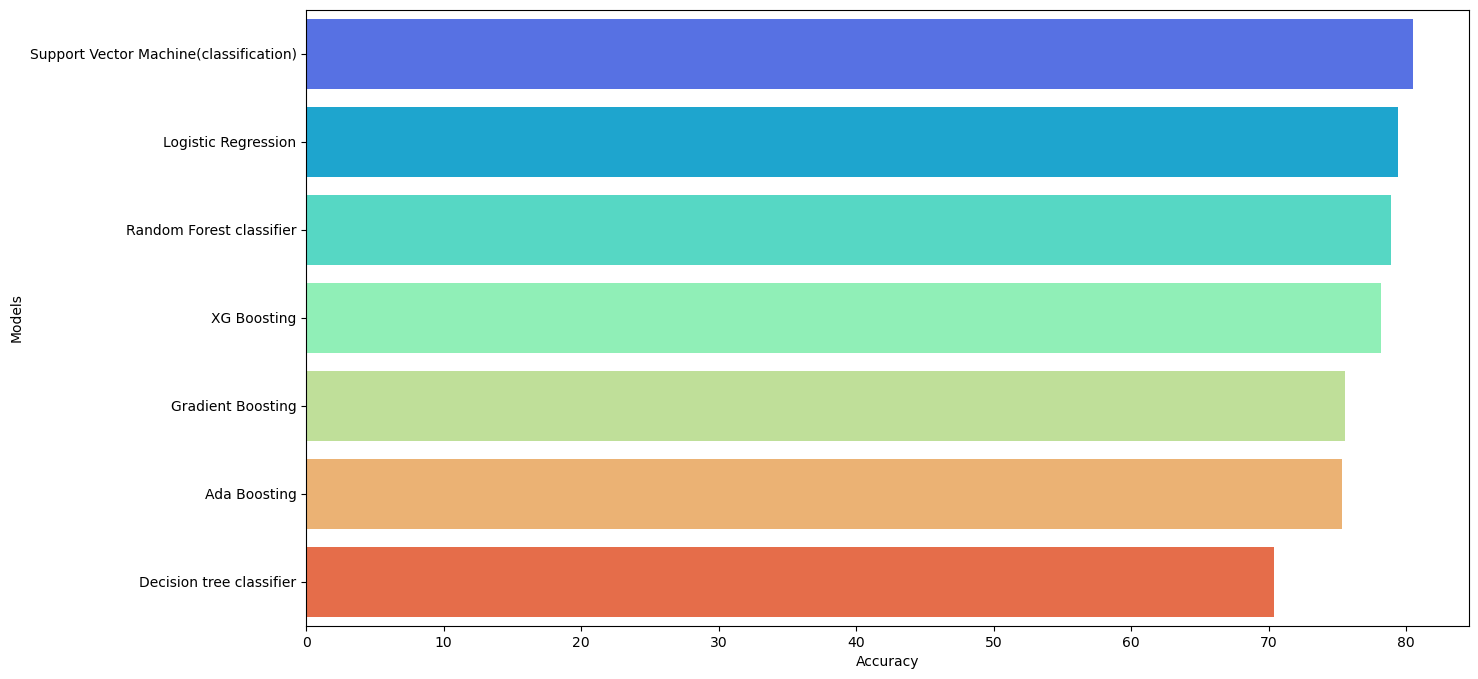

In [200]:
sns.barplot(x=df['Accuracy'],y=df['Models'],palette='rainbow')
plt.show()

## Prediction on Test dataset

In [203]:
test_df = test['cleaned text']
test_df

0                                happen terribl car crash
1           heard earthquak differ citi stay safe everyon
2       forest fire spot pond gee flee across street c...
3                          apocalyps light spokan wildfir
4                      typhoon soudelor kill china taiwan
                              ...                        
3258        earthquak safeti los angel safeti fasten xrwn
3259    storm ri wors last hurrican citi amp other har...
3260         green line derail chicago http co utbxlcbiuy
3261    meg issu hazard weather outlook hwo http co x ...
3262      cityofcalgari activ municip emerg plan yycstorm
Name: cleaned text, Length: 3263, dtype: object

In [205]:
x = test['id']
x

0           0
1           2
2           3
3           9
4          11
        ...  
3258    10861
3259    10865
3260    10868
3261    10874
3262    10875
Name: id, Length: 3263, dtype: int64

In [211]:
test_tfidf = tfidf.transform(test_df)
print(test_tfidf)

  (0, 12243)	0.6379426521311179
  (0, 5084)	0.488235986752432
  (0, 2405)	0.41167725644173103
  (0, 1687)	0.43032154298896524
  (1, 11750)	0.3793625999936718
  (1, 10858)	0.41765354569137303
  (1, 5185)	0.3793625999936718
  (1, 3792)	0.33986035730541175
  (1, 3374)	0.3546517053531935
  (1, 2942)	0.42838425312269673
  (1, 2006)	0.336061881685986
  (2, 11837)	0.3036205103135203
  (2, 11645)	0.31300835893292184
  (2, 10941)	0.2652131029710866
  (2, 9622)	0.38337264844854
  (2, 8609)	0.34050640600898224
  (2, 4270)	0.27805190615109615
  (2, 4178)	0.38337264844854
  (2, 4126)	0.19590014667728683
  (2, 1644)	0.34050640600898224
  (2, 89)	0.31300835893292184
  (3, 13792)	0.524877601092374
  (3, 7120)	0.5933251150626945
  (3, 486)	0.6103022298069662
  (4, 12861)	0.4264656469006429
  :	:
  (3259, 2006)	0.22017836187748321
  (3259, 1276)	0.17164200724507067
  (3259, 570)	0.2383020644589863
  (3259, 382)	0.16129754093919815
  (3260, 7147)	0.49756061651805034
  (3260, 5492)	0.12808040099823995
  (

In [213]:
test_pred = S.predict(test_tfidf)
test_pred = pd.DataFrame(test_pred,columns = ['target'])
test_pred

,target
0,1
1,1
2,1
3,0
4,1
...,...
3258,0
3259,1
3260,1
3261,1


In [215]:
submission_df = pd.concat([x,test_pred],axis=1)
submission_df

,id,target
0,0,1
1,2,1
2,3,1
3,9,0
4,11,1
...,...,...
3258,10861,0
3259,10865,1
3260,10868,1
3261,10874,1


## Submission File 

In [224]:
submission_df.to_csv('Prediction File.csv',index= False)

In [220]:
t=submission_df['target'].value_counts()
t

target
0    2140
1    1123
Name: count, dtype: int64

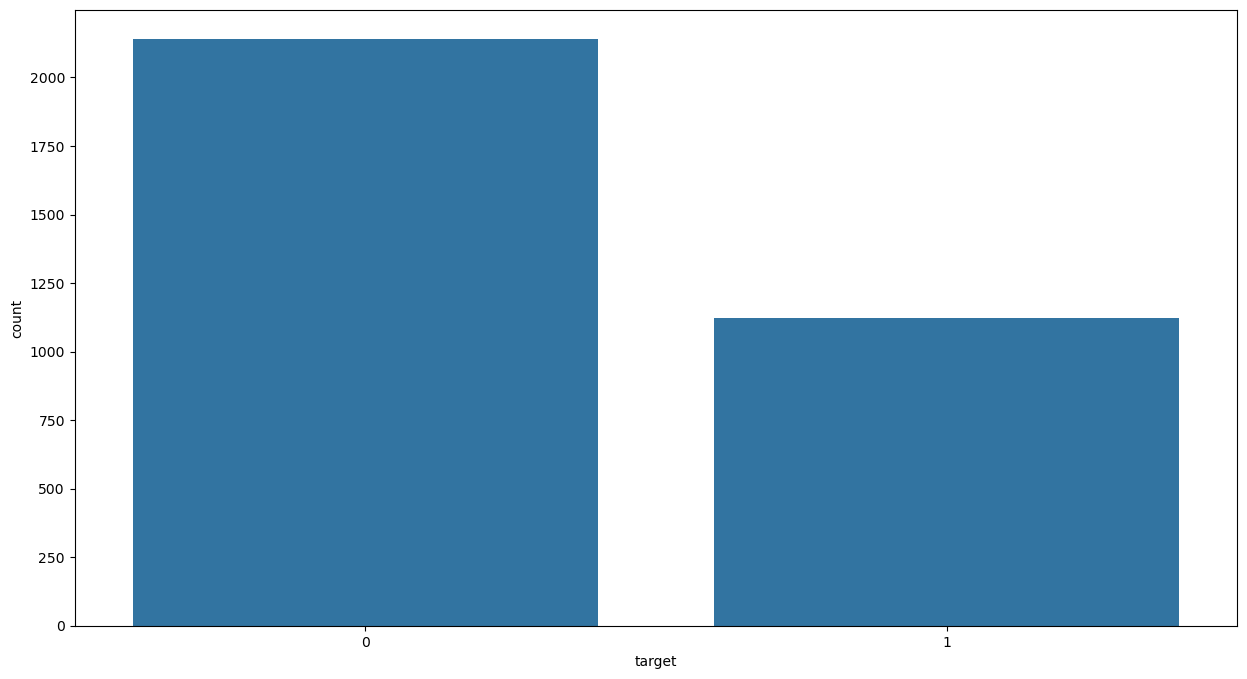

In [222]:
sns.barplot(x=t.index,y=t)
plt.show()